<a href="https://colab.research.google.com/github/raziraz03/Final_ML/blob/main/foodranking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Asses the performance of Food in a Restaurant**

**Objective**

**The objective of this project is to evaluate user feedback across the 18,182 recipe reviews to assess the performance of dishes in the dataset, identify common user behaviors, and provide insights for recipe improvement or curation. Specifically, the analysis seeks to:**

     

*   Measure overall user satisfaction and engagement across recipes based on ratings and interaction metrics.
*   Identify patterns in user feedback, such as frequent modifications or recurring issues, that apply to multiple dishes.
*   Assess the  distribution of recipes using identifiers like recipe_number and recipe_code.
*  Find the best dish by analyzing the user input like thumpsup,thumps down,stars


    
    
    

**Below are the libraries used for the project**

**Plugins used till creating ML including graphical representation following plugins are used**


```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore,boxcox
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
```

**Plugins used for ML algorithams and validation are**


```
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore,boxcox
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**Loading Data**


Data can be loaded from different sources

*   pd.read_json('Recipedata.json', orient='records')
*   pd.read_csv('Recipedata.csv')
*   pd.read_sql(query, con, ...)
*   pd.read_excell(io, ...)
*   pd.read_pickle(filepath_or_buffer, ...)
*   pd.read_table(filepath_or_buffer, ...)
*   pd.read_html(io, ...)
*   pd.read_feather(filepath_or_buffer, ...)
*   pd.read_parquet(path, ...)
*   pd.read_hdf(path_or_buf, key, ...)

In [2]:
#loading data
data= pd.read_csv('Recipedata.csv')

**Starting EDA and Pre-Processing**

Here we start with .info to print the total number of column with what each  column is about like the datatype,notnull or not  etc..

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


Here .describe used to find out the advanced details of the table like mean,median,count quantile range thiss whill help us to find out how the data is dealing  like outliers etc..

In [4]:
data.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


**printing the first 5 data from begining**

In [5]:
data.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


printing the last 5 data from dataset

In [6]:
data.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


Displaying the total number of columns and rows

In [7]:
data.shape

(18182, 15)

Now sorting data to show only int and float

In [8]:
datainteger = data.select_dtypes(include=['number'])

In [9]:
datainteger.skew()

,0
Unnamed: 0,2.111974
recipe_number,0.458893
recipe_code,3.443731
user_reputation,33.718475
created_at,5.449677
reply_count,11.283080
thumbs_up,8.414118
thumbs_down,17.890266
stars,-2.128602
best_score,3.402575


**finding if any null values are there**

In [10]:
datainteger.isnull().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
user_reputation,0
created_at,0
reply_count,0
thumbs_up,0
thumbs_down,0
stars,0
best_score,0


In [11]:
datainteger.duplicated().sum()

np.int64(0)

drawing the histogram to show how the skewness is left skewed ,right skewed etc.. can be known form here




Text(0.5, 0, 'Histogram')

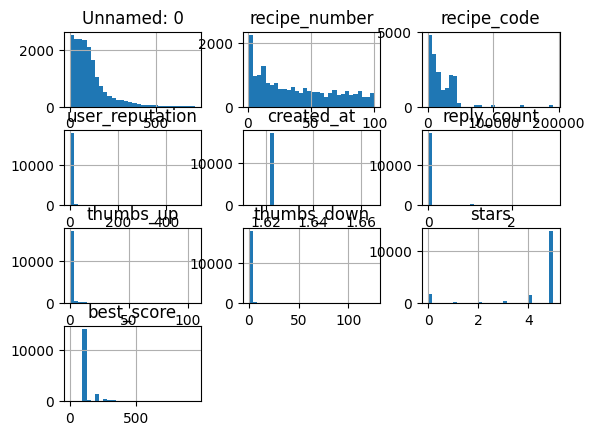

In [12]:
#checking the data with boxplot and histogram
datainteger.hist(bins=30)
plt.xlabel("Histogram")

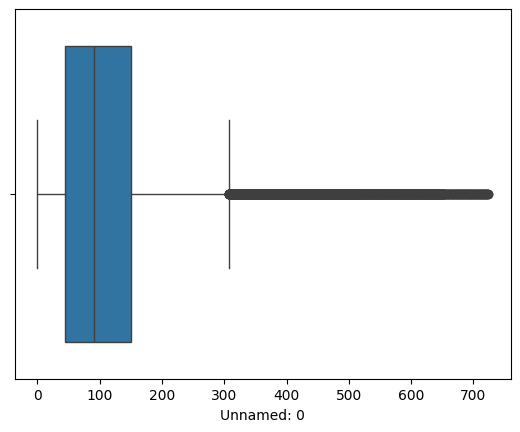

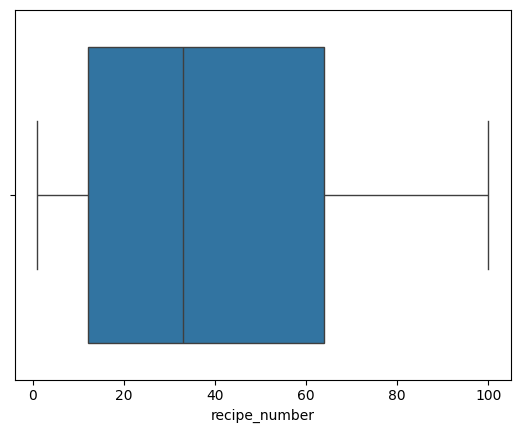

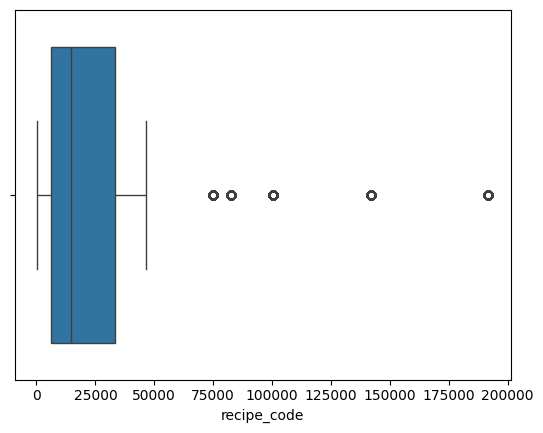

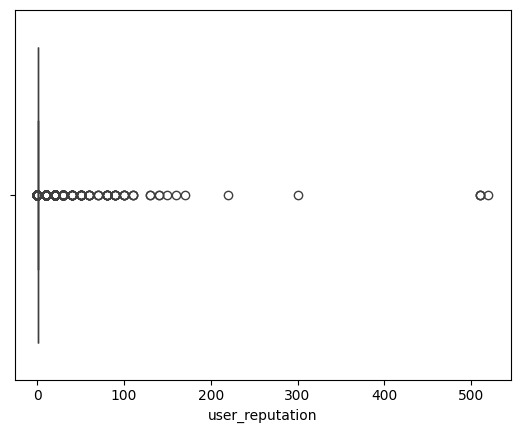

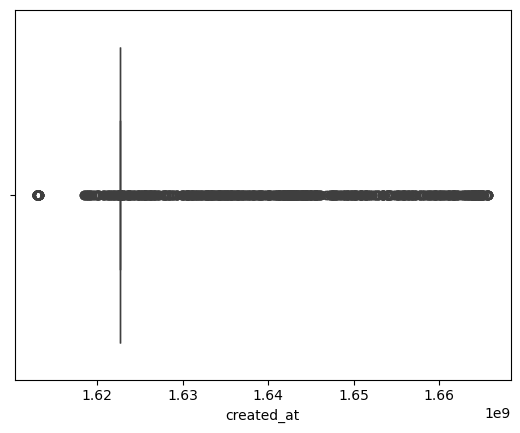

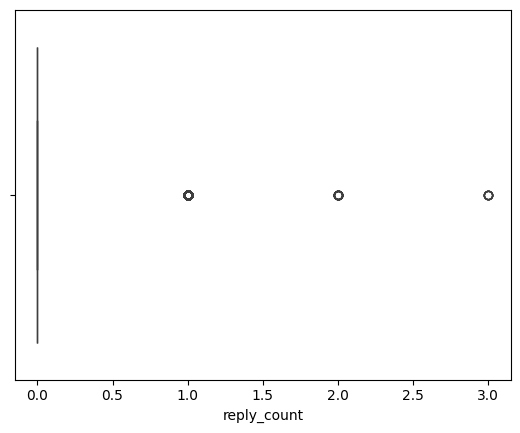

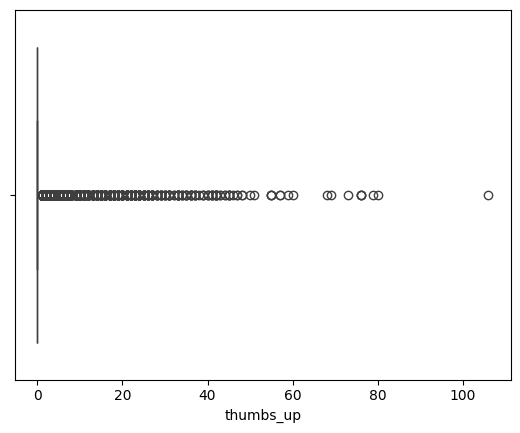

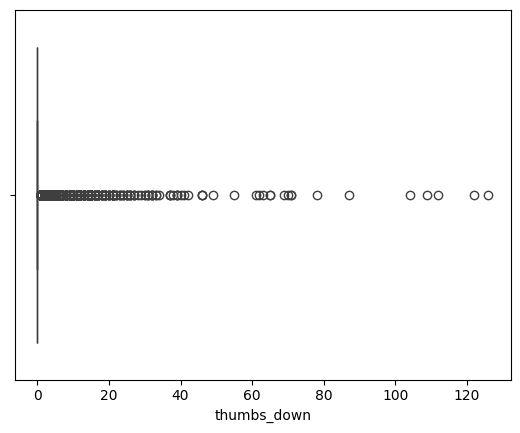

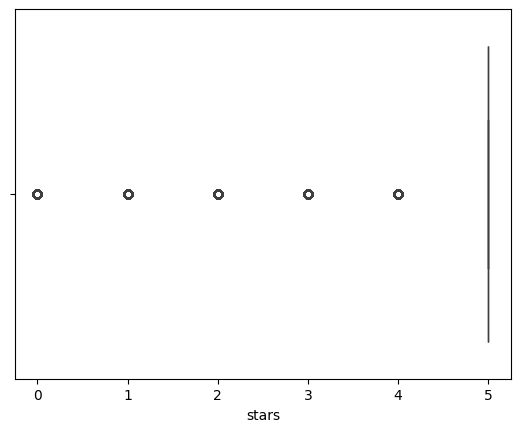

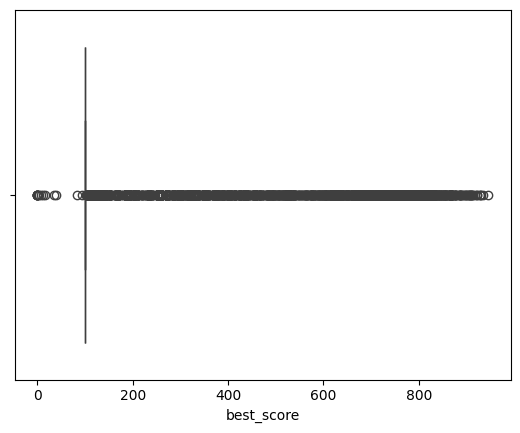

In [13]:
for i in datainteger.columns:
  sns.boxplot(data=datainteger,x=i)
  plt.show()

**Apply winsorization to reduce the skewness**

Checking the skewness to know if the data can be used for buiding the model

**Using the IQR method  to find the outliers and capping it.**

In [14]:
# iqrcols=['reply_count','user_reputation','best_score','thumbs_up','thumbs_down','stars']
iqrcols=['reply_count']
for col in iqrcols:
    # Calculate IQR bounds
    iqr1 = datainteger[col].quantile(0.25)  # Q1
    iqr3 = datainteger[col].quantile(0.75)  # Q3
    iqr = iqr3 - iqr1
    lowerwisk = iqr1 - (1.5 * iqr)
    upperwisk = iqr3 + (1.5 * iqr)

    # Apply IQR treatment (cap outliers)
    datainteger[col] = datainteger[col].apply(lambda x: lowerwisk if x < lowerwisk else upperwisk if x > upperwisk else x)


In [15]:
datainteger.skew()

,0
Unnamed: 0,2.111974
recipe_number,0.458893
recipe_code,3.443731
user_reputation,33.718475
created_at,5.449677
reply_count,0.000000
thumbs_up,8.414118
thumbs_down,17.890266
stars,-2.128602
best_score,3.402575


**using transformation to reduce the skewness by transforming the data**

In [16]:
# Add a larger shift to avoid log(0) and reduce skewness
# datainteger['thumbs_up'] = np.log1p(datainteger['thumbs_up']+100)
# datainteger['thumbs_down'] = np.log1p(datainteger['thumbs_down']+100)


columns_to_transform = ['Unnamed: 0','recipe_code','reply_count', 'created_at', 'best_score', 'thumbs_up', 'thumbs_down']

for collog in columns_to_transform:
  datainteger[collog]=np.log1p(datainteger[collog])

# for cols in columns_to_transform:
#   datainteger[cols]=np.sqrt(datainteger[cols])

# for cols in columns_to_transform:
#   datainteger[cols]=np.cbrt(datainteger[cols])

In [17]:
datainteger.skew()

,0
Unnamed: 0,-0.973161
recipe_number,0.458893
recipe_code,-0.710209
user_reputation,33.718475
created_at,5.430625
reply_count,0.000000
thumbs_up,2.605970
thumbs_down,3.927082
stars,-2.128602
best_score,1.827808


**Making the data more distributed using power transformtion methods**

In [18]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
high_skew = ['Unnamed: 0','recipe_code','reply_count','stars','user_reputation']
for col in high_skew:

    datainteger[col] = pt.fit_transform(datainteger[[col]])

In [19]:
datainteger.skew()

,0
Unnamed: 0,-0.063692
recipe_number,0.458893
recipe_code,-0.074551
user_reputation,-1.548602
created_at,5.430625
reply_count,0.000000
thumbs_up,2.605970
thumbs_down,3.927082
stars,-1.527327
best_score,1.827808


**DATA TRANSFORMATION: Using BOX- COX to reduce the skewness of data**

In [20]:
high_skew_boxcox = ['user_reputation','thumbs_up','thumbs_down','stars','best_score']
for col in high_skew_boxcox :
  if (datainteger[col] > 0).all():
    datainteger[col], _ = boxcox(datainteger[col] + 1e-6)

In [21]:
datainteger.skew()

,0
Unnamed: 0,-0.063692
recipe_number,0.458893
recipe_code,-0.074551
user_reputation,-1.548602
created_at,5.430625
reply_count,0.000000
thumbs_up,2.605970
thumbs_down,3.927082
stars,-1.527327
best_score,1.827808


**checking the correlation between data to know how each data are correlated to each other using correlation and heatmpa is used to show this graphicall method**

In [22]:
checkcorel=datainteger.corr()
print(checkcorel)

                 Unnamed: 0  recipe_number  recipe_code  user_reputation  \
Unnamed: 0         1.000000      -0.463723    -0.131349        -0.040420   
recipe_number     -0.463723       1.000000     0.235564         0.036717   
recipe_code       -0.131349       0.235564     1.000000         0.004400   
user_reputation   -0.040420       0.036717     0.004400         1.000000   
created_at        -0.409018       0.032517    -0.005976         0.113089   
reply_count             NaN            NaN          NaN              NaN   
thumbs_up         -0.557893       0.119915     0.012622        -0.008527   
thumbs_down       -0.388466       0.094696    -0.001056        -0.025203   
stars              0.067780      -0.056736    -0.026436         0.020612   
best_score        -0.593181       0.113230     0.014811         0.040373   

                 created_at  reply_count  thumbs_up  thumbs_down     stars  \
Unnamed: 0        -0.409018          NaN  -0.557893    -0.388466  0.067780   
recipe_

**Deleting two columns from the dataset to avoid noise and also deleting based on the correlation**

In [23]:
datainteger.drop('reply_count', axis=1, inplace=True)
datainteger.drop('Unnamed: 0', axis=1, inplace=True)

<Axes: >

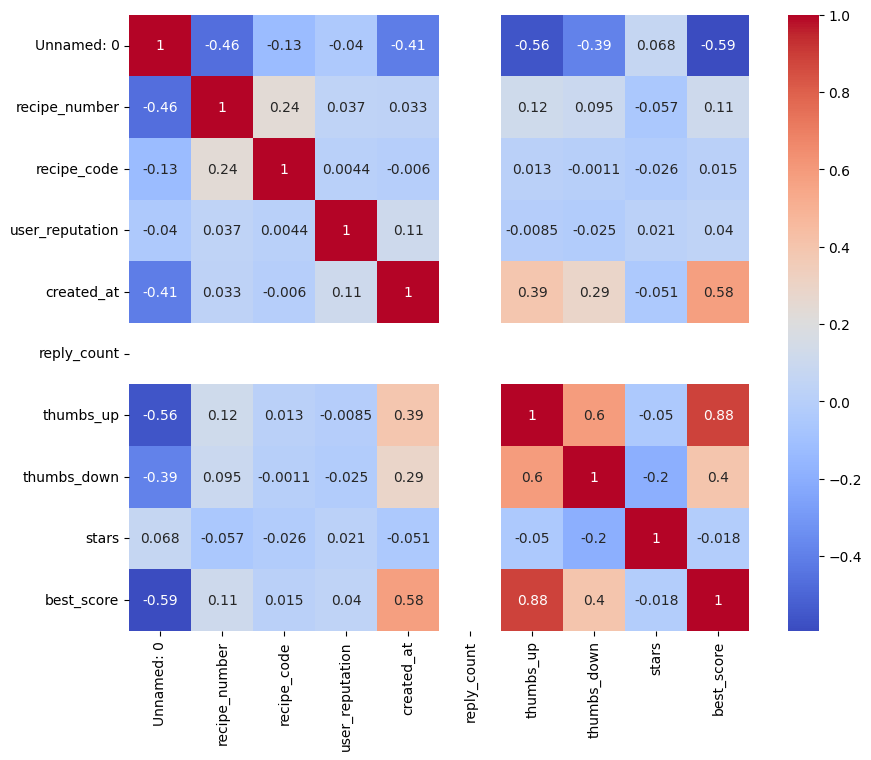

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(checkcorel,annot=True, cmap="coolwarm")


**Checking the boxplot to see the distribution of data and outliers**

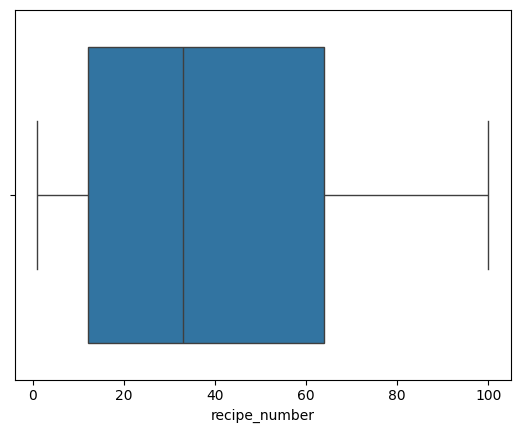

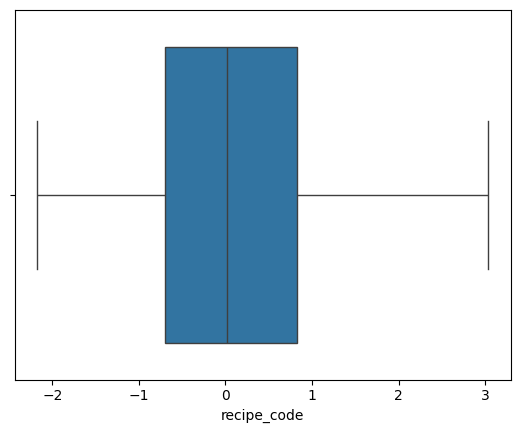

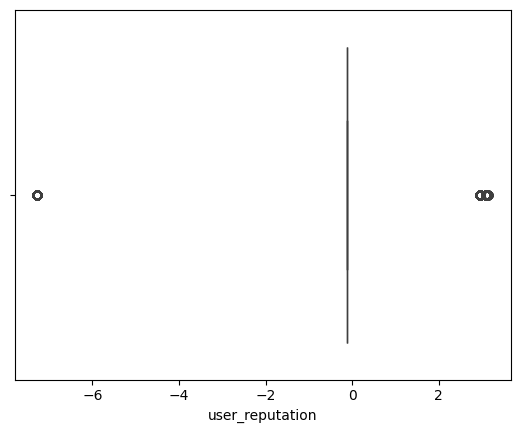

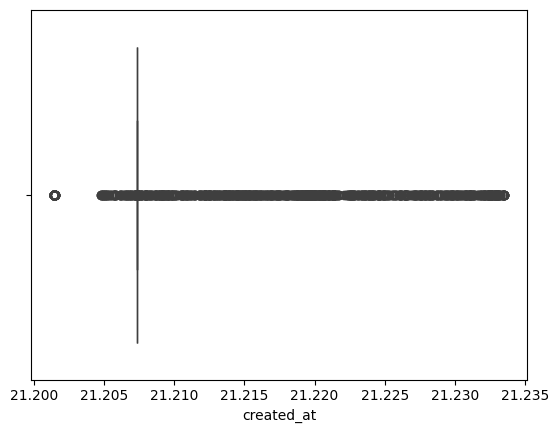

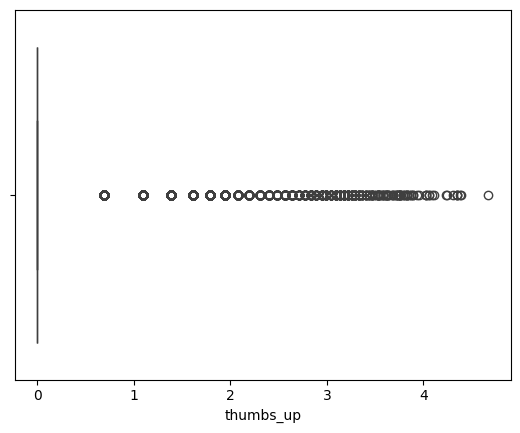

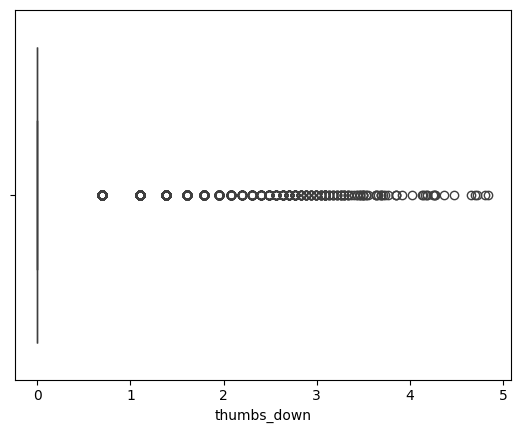

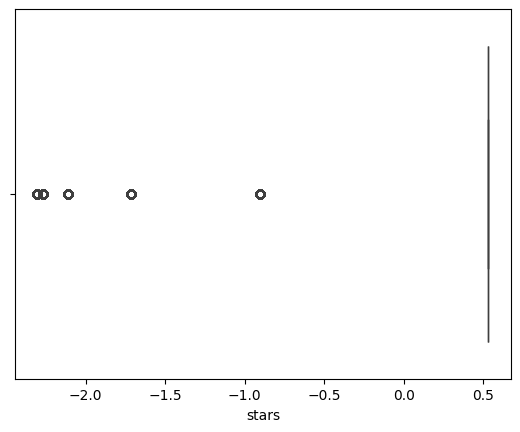

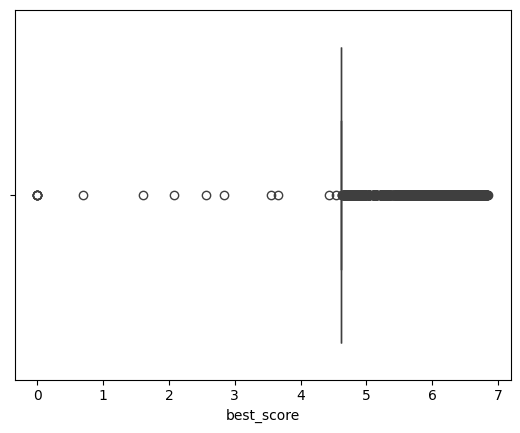

In [25]:
for i in datainteger.columns:
  sns.boxplot(data=datainteger,x=i)
  plt.show()

Text(0.5, 0, 'Data')

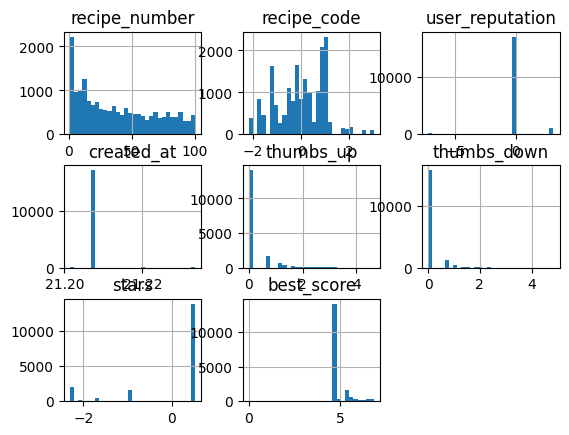

In [26]:
datainteger.hist(bins=30)
plt.xlabel("Data")

{'whiskers': [<matplotlib.lines.Line2D at 0x7e69399e7210>,
 'caps': [<matplotlib.lines.Line2D at 0x7e6939b8b110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e6939933790>,
 'medians': [<matplotlib.lines.Line2D at 0x7e69399c7b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e69399c4910>,
 'means': []}

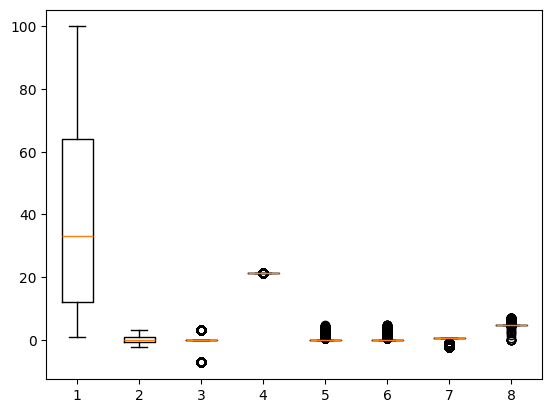

In [27]:
plt.boxplot(datainteger)

In [28]:
datainteger.skew()

,0
recipe_number,0.458893
recipe_code,-0.074551
user_reputation,-1.548602
created_at,5.430625
thumbs_up,2.605970
thumbs_down,3.927082
stars,-1.527327
best_score,1.827808


Below is the kurtosis method to check the thickness of tail and height of peak.If the value is greater than 3 then there is issue with the data whcih need trimming or capping

In [29]:
datainteger.skew()

,0
recipe_number,0.458893
recipe_code,-0.074551
user_reputation,-1.548602
created_at,5.430625
thumbs_up,2.605970
thumbs_down,3.927082
stars,-1.527327
best_score,1.827808


In [30]:
datainteger['stars'] = pt.fit_transform(datainteger[['stars']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e693889e950>,
 'caps': [<matplotlib.lines.Line2D at 0x7e693889fc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e693889e0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7e69388b0f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e69388b1890>,
 'means': []}

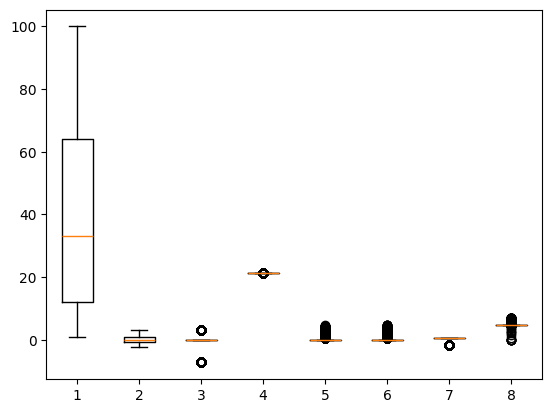

In [31]:
plt.boxplot(datainteger)

**Split Data into Training and Testing Sets:**

In [32]:
X = datainteger[['recipe_number',
 'recipe_code',
 'user_reputation',
 'created_at',
 'thumbs_up',
 'thumbs_down',
 'stars']]

In [33]:
y = datainteger['best_score']

In [34]:
select=SelectKBest(score_func=f_classif)
X_new=select.fit_transform(X,y)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Checking the shape of train and test data**

In [36]:
X_train.shape
X_test.shape
print(f"X train{X_train.shape}X_test{X_test.shape}y_train{y_train.shape}y_test{y_test.shape}")

X train(14545, 7)X_test(3637, 7)y_train(14545,)y_test(3637,)


**Feature Selection Method**

In [ ]:
feature_score=pd.DataFrame({'features':X.columns, 'score':select.scores_}).sort_values(by='score',ascending=False)
feature_score

,features,score
4,thumbs_up,704.497457
3,created_at,125.390301
5,thumbs_down,68.608002
2,user_reputation,3.503914
0,recipe_number,2.004319
6,stars,1.945052
1,recipe_code,1.126666


**Implimenting Models**


* Linear Regression
* GradientBoostingRegressor
* RandomForestRegressor
* SVR
* DecisionTreeRegressor







In [ ]:
models={'Linear Regression':LinearRegression(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'Random Foresr Regressor':RandomForestRegressor(),
        'SVR':SVR(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

# Train and evaluate models
results =[]

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  r2square=r2_score(y_test,y_pred)

  results.append({
            'Model': name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2square
        })

resultdf = pd.DataFrame(results)
resultdf





,Model,MSE,RMSE,MAE,R²
0,Linear Regression,0.026560,0.162971,0.074895,0.891827
1,GradientBoostingRegressor,0.019367,0.139165,0.019316,0.921122
2,Random Foresr Regressor,0.018835,0.137242,0.010929,0.923287
3,SVR,0.056359,0.237401,0.140363,0.770457
4,DecisionTreeRegressor,0.040175,0.200438,0.013031,0.836372


**Choosing Gradient Boosting Regressor alogortitham to create model**

Gradient Boosting was having the highest score of 0.92 so selected this algoritham


In [44]:
performpipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Optional: only if data has NaNs
    ('regressor', GradientBoostingRegressor())
])

performpipeline.fit(X_train,y_train)
y_pred=performpipeline.predict(X_test)
r2squarefinal=r2_score(y_test,y_pred)

print("R2score")
print(r2squarefinal)

R2score
0.9213349049153412
